# Importing Libraries


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt

# Importing Dataset

In [3]:
df=pd.read_csv("Iris.csv")
df.drop("Id",axis="columns",inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Check for Null Values

In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# More info about dataset


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking corelation

In [7]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


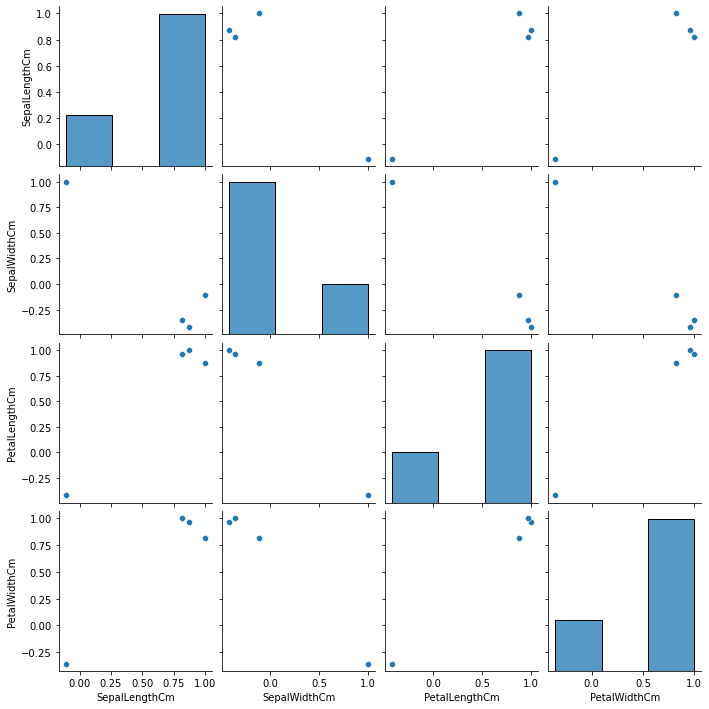

In [8]:
sns.pairplot(df.corr())

# Check for duplicated values

In [10]:
df.duplicated().sum()

3

Means there are 3 duplicate values in the dataset , removing the values so that model can trained effectively

In [12]:
df=df.drop_duplicates()
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
df.duplicated().sum()

0

No duplicate values remaining in the dataset

# Converting the numerical data to Categorical Data ( Species to be determined)

In [15]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [16]:
df["Species"]=l.fit_transform(df["Species"])

In [17]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
x=df.drop("Species",axis="columns")


In [19]:
y=df["Species"]

# Splitting of dataset to avoid overfitting

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Building Models

# Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [23]:
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
model.score(x_test,y_test)

0.9333333333333333

In [25]:
predict=model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(predict,y_test)

Text(33.0, 0.5, 'Actual Value')

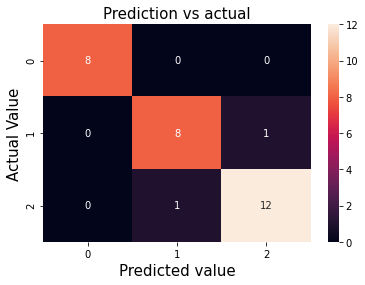

In [27]:
sns.heatmap(cf,annot=True)
plt.title("Prediction vs actual",fontsize=15)
plt.xlabel("Predicted value",fontsize=15)
plt.ylabel("Actual Value",fontsize=15)

# Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()

In [29]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
model1.score(x_test,y_test)

0.9666666666666667

In [31]:
predict1=model1.predict(x_test)

In [32]:
cf1=confusion_matrix(predict,y_test)

Text(33.0, 0.5, 'Actual Value')

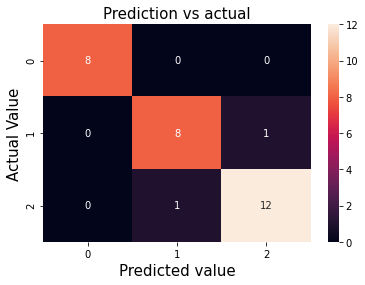

In [33]:
sns.heatmap(cf1,annot=True)
plt.title("Prediction vs actual",fontsize=15)
plt.xlabel("Predicted value",fontsize=15)
plt.ylabel("Actual Value",fontsize=15)

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()

In [35]:
model2.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
model2.score(x_test,y_test)

0.9333333333333333

In [37]:
predict3=model.predict(x_test)
predict3

array([0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 0, 1, 0, 1, 1, 0, 1])

In [38]:
cf2=confusion_matrix(predict3,y_test)
cf2

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 12]])

Text(33.0, 0.5, 'Actual Value')

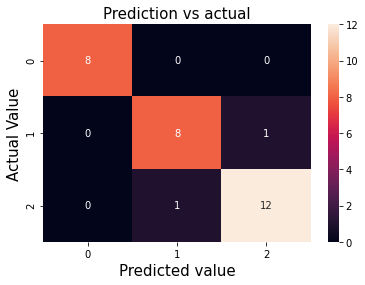

In [39]:
sns.heatmap(cf2,annot=True)
plt.title("Prediction vs actual",fontsize=15)
plt.xlabel("Predicted value",fontsize=15)
plt.ylabel("Actual Value",fontsize=15)

# SVM

In [40]:
from sklearn.svm import SVC

In [41]:
model3=SVC()

In [42]:
model3.fit(x_train,y_train)


SVC()

In [43]:
model3.score(x_test,y_test)

0.9333333333333333

In [44]:
predict3=model3.predict(x_test)
predict3

array([0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 0, 1, 0, 1, 1, 0, 1])

In [47]:
cf3=confusion_matrix(y_test,predict3)

In [48]:
cf3

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 12]])

Text(33.0, 0.5, 'Actual Values')

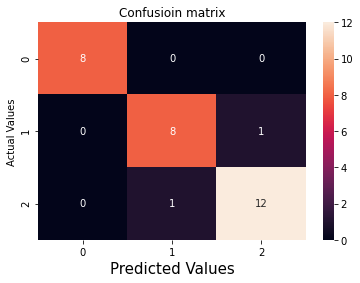

In [50]:
sns.heatmap(cf3,annot=True)
plt.title("Confusioin matrix")
plt.xlabel("Predicted Values",fontsize=15)
plt.ylabel("Actual Values")

# Visualization

In [51]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(6.799999999999997, 0.5, 'PetalWidthCm')

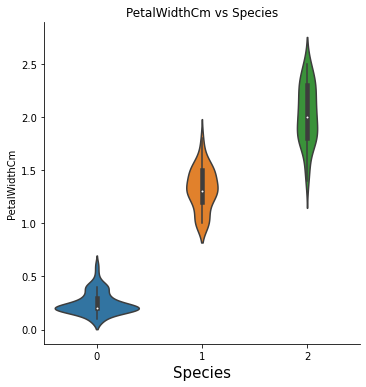

In [55]:
sns.catplot(y="PetalWidthCm",x="Species",data=df,kind="violin")
plt.title("PetalWidthCm vs Species")
plt.xlabel("Species",fontsize=15)
plt.ylabel("PetalWidthCm")

In [57]:
df["Species"].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

0 : Setosa
1 : Verginica
2 : Versicolor